          Node  myRouteTimeout_mean  myRouteTimeout_std  deletePeriod_mean  \
0    node[100]             2.072903            0.393307           4.145806   
1    node[103]             2.510934            0.718490           5.021867   
2    node[104]             3.313804            1.987415           6.627607   
3    node[105]             2.823054            1.158656           5.646108   
4    node[106]             2.102535            0.081310           4.205070   
..         ...                  ...                 ...                ...   
180   node[96]             2.766338            0.733244           5.532677   
181   node[97]             2.858005            0.713426           5.716009   
182   node[99]             3.469348            0.657267           6.938696   
183    node[9]             2.868320            0.404100           5.736640   
184     rsu[0]             0.951152            0.032118           1.902305   

     deletePeriod_std  
0            0.786614  
1            1.

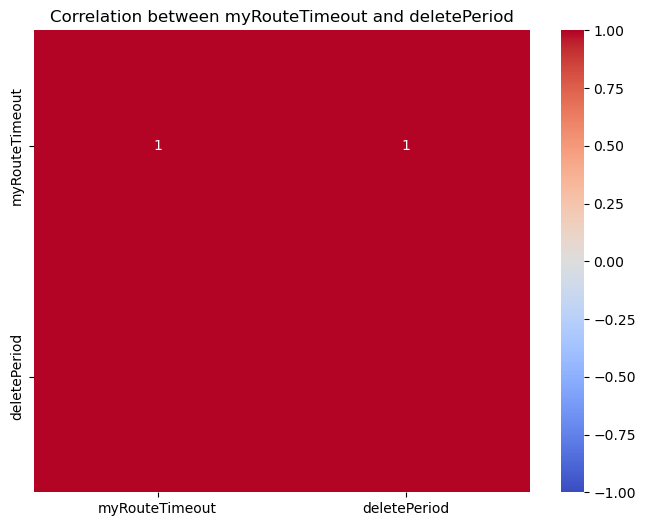

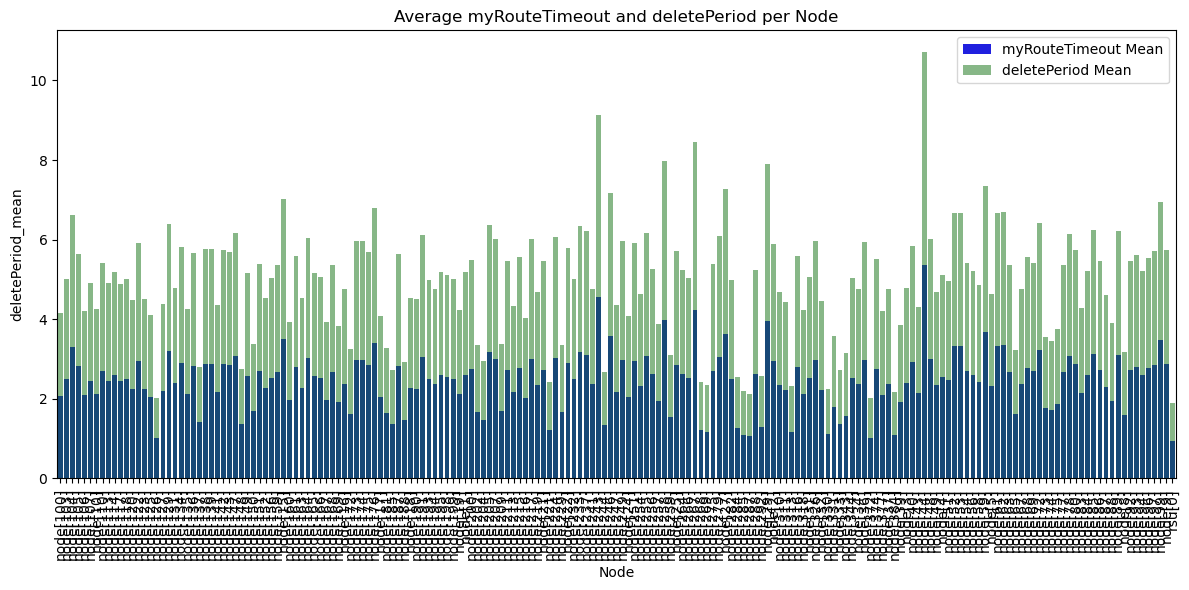

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 로그 파일에서 데이터를 로드하는 함수
def load_data_from_log(file_path):
    data = []
    
    with open(file_path, 'r') as file:
        for line in file:
            # 로그에서 값을 추출 (Time, Node, myRouteTimeout, deletePeriod)
            line_parts = line.split(',')
            time = float(line_parts[0].split(':')[1].strip())
            node = line_parts[1].split(':')[1].strip()
            my_route_timeout = float(line_parts[2].split(':')[1].strip())
            delete_period = float(line_parts[3].split(':')[1].strip())
            
            data.append([time, node, my_route_timeout, delete_period])
    
    # 데이터를 DataFrame으로 변환
    return pd.DataFrame(data, columns=['Time', 'Node', 'myRouteTimeout', 'deletePeriod'])

# 전체 노드에 대한 통계 분석
def analyze_data_summary(data):
    # Node별로 그룹화하여 myRouteTimeout과 deletePeriod의 평균 및 표준편차 계산
    summary = data.groupby('Node').agg({
        'myRouteTimeout': ['mean', 'std'],
        'deletePeriod': ['mean', 'std']
    }).reset_index()
    
    summary.columns = ['Node', 'myRouteTimeout_mean', 'myRouteTimeout_std', 'deletePeriod_mean', 'deletePeriod_std']
    
    print(summary)
    
    # 이상치 탐지: 평균값에서 크게 벗어난 값 검출
    outliers = data[(data['myRouteTimeout'] > data['myRouteTimeout'].mean() + 3 * data['myRouteTimeout'].std()) |
                    (data['deletePeriod'] > data['deletePeriod'].mean() + 3 * data['deletePeriod'].std())]
    
    print("\nDetected Outliers:")
    print(outliers)

    return summary, outliers

# 상관관계 분석 및 히트맵 시각화
def correlation_analysis(data):
    # 상관관계 계산
    correlation_matrix = data[['myRouteTimeout', 'deletePeriod']].corr()
    
    # 히트맵 시각화
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title('Correlation between myRouteTimeout and deletePeriod')
    plt.show()

# 로그 파일 경로
log_file_path = 'route_timers_log.txt'

# 데이터 로드 및 분석
data = load_data_from_log(log_file_path)

# 요약 통계 및 이상치 검출
summary, outliers = analyze_data_summary(data)

# 상관관계 분석
correlation_analysis(data)

# 노드별 myRouteTimeout 및 deletePeriod 평균을 시각화
plt.figure(figsize=(12, 6))
sns.barplot(x='Node', y='myRouteTimeout_mean', data=summary, color='blue', label='myRouteTimeout Mean')
sns.barplot(x='Node', y='deletePeriod_mean', data=summary, color='green', label='deletePeriod Mean', alpha=0.5)
plt.xticks(rotation=90)
plt.title('Average myRouteTimeout and deletePeriod per Node')
plt.legend()
plt.tight_layout()
plt.show()
